In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
data_dir = "/home/aarav/1_pytor_train/data/horse-or-human"

In [3]:
valid_size = .2

In [4]:
# Normalize the test and train sets with torchvision
train_transforms = transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           ])

test_transforms = transforms.Compose([transforms.Resize(224),
                                          transforms.ToTensor(),
                                          ])


In [5]:
# ImageFolder class to load the train and test images
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

In [6]:
train_data.classes

['horses', 'humans']

In [7]:
# Number of train images
num_train = len(train_data)
indices = list(range(num_train))

In [8]:
num_train

1027

In [9]:
# Split = 20% of train images
split = int(np.floor(valid_size * num_train))
# Shuffle indices of train images
np.random.shuffle(indices)

In [10]:
print(split)

205


In [11]:
indices

[802,
 541,
 893,
 205,
 463,
 777,
 864,
 719,
 65,
 902,
 618,
 211,
 340,
 502,
 936,
 997,
 386,
 218,
 356,
 980,
 89,
 908,
 11,
 113,
 604,
 503,
 712,
 433,
 979,
 1008,
 965,
 534,
 176,
 888,
 765,
 346,
 935,
 428,
 22,
 836,
 1024,
 805,
 207,
 1021,
 615,
 86,
 200,
 699,
 73,
 903,
 174,
 167,
 1,
 254,
 39,
 793,
 40,
 508,
 123,
 990,
 523,
 876,
 928,
 678,
 235,
 536,
 64,
 602,
 925,
 742,
 950,
 974,
 264,
 880,
 96,
 664,
 398,
 568,
 601,
 180,
 872,
 3,
 716,
 237,
 281,
 962,
 679,
 952,
 453,
 464,
 422,
 982,
 717,
 627,
 111,
 840,
 845,
 673,
 195,
 730,
 581,
 810,
 814,
 639,
 14,
 202,
 771,
 895,
 515,
 127,
 199,
 231,
 471,
 57,
 33,
 871,
 675,
 372,
 222,
 450,
 396,
 495,
 71,
 436,
 317,
 220,
 684,
 410,
 799,
 160,
 751,
 322,
 624,
 55,
 506,
 478,
 63,
 109,
 800,
 122,
 512,
 46,
 626,
 418,
 959,
 481,
 309,
 488,
 785,
 301,
 813,
 27,
 30,
 517,
 497,
 662,
 456,
 256,
 748,
 244,
 444,
 227,
 126,
 956,
 769,
 632,
 425,
 243,
 403,
 501,


In [12]:
# Subset indices for test and train
train_idx, test_idx = indices[split:], indices[:split]

In [13]:
len(train_idx)

822

In [14]:
len(test_idx)

205

In [15]:
# Samples elements randomly from a given list of indices
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [16]:
# Batch and load the images
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=10)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=10)

In [17]:
print(trainloader.dataset.classes)

['horses', 'humans']


In [18]:
examples = iter(trainloader)
samples ,labels = examples.next()
samples.shape

torch.Size([10, 3, 224, 224])

In [19]:
labels.shape

torch.Size([10])

In [20]:
#labels.unsqueeze(1).float()

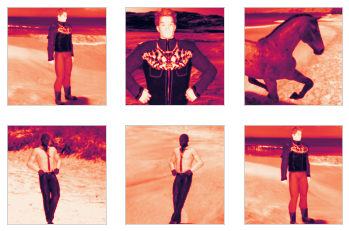

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i][0])
plt.show()

In [22]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [23]:
out = torchvision.utils.make_grid(samples)

In [24]:
class_name = train_data.classes

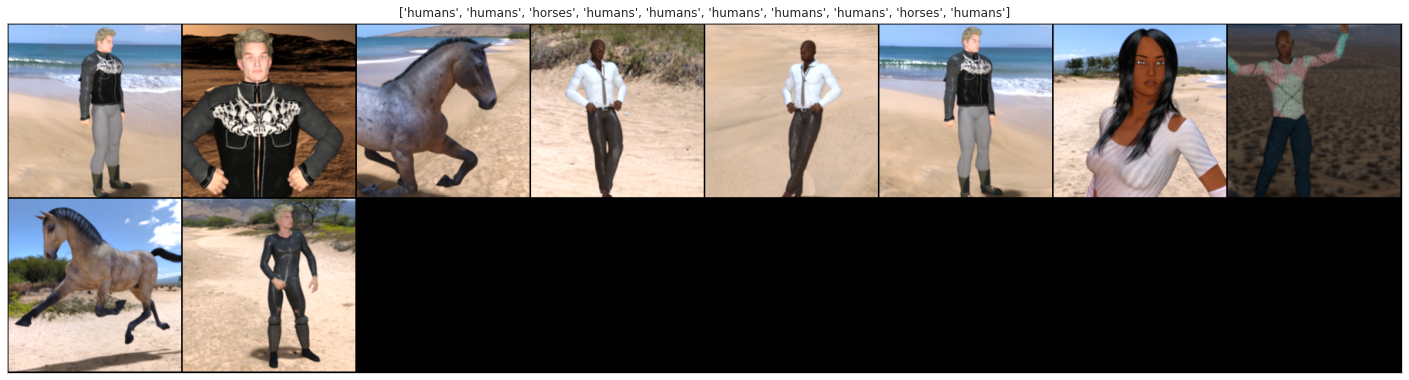

In [25]:
imshow(out,title=[class_name[x] for x in labels])

In [26]:
# single image plt

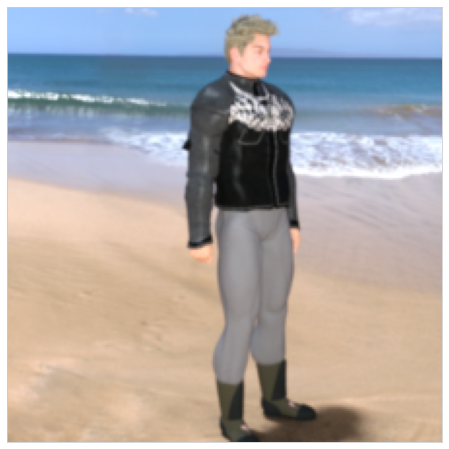

In [27]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title(title)
    plt.show()
imshow(samples[0])

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
device

device(type='cuda')

In [30]:
model = models.resnet50(pretrained=True)

In [31]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 1))
                                 # nn.LogSoftmax(dim=1))

In [33]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [34]:
from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = BCEWithLogitsLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
#Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

/home/aarav/anaconda3/envs/pract/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Finished Training


In [36]:
samples[0].shape

torch.Size([3, 224, 224])

In [37]:
type(samples[0])

torch.Tensor

In [38]:
test = samples[4].view(1,3,224,224)

In [39]:
test.shape

torch.Size([1, 3, 224, 224])

In [40]:
test = test.to(device)

In [41]:
model(test)

tensor([[-2.9824]], device='cuda:0', grad_fn=<AddmmBackward>)